# 회귀(Regression)

예측할 값(Target)이 연속형(continuous) 데이터(float)인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

In [ ]:
from sklearn.metrics import r2_score

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    

$$
R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

$$
y_i: i번째정답 값\\
\hat{y_i}: model이 예측한 i번째 값\\
\bar{y}: y의 평균
$$

### 예제

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data 관련
from sklearn.datasets import make_regression

# model 관련
from sklearn.linear_model import LinearRegression

# evaluation index 관련
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# cross validation 관련
from sklearn.model_selection import cross_val_score

##### Dataset 생성
- make_xxxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy dataset 생성

In [ ]:
# scikit-learn에서 제공하는 toy data를 사용해보자.
# make_regression()을 사용해 regression 문제를 위한 dummy dataset을 생성한다.

In [ ]:
# n_samples는 생성할 data의 개수를 설정한다.
# n_features는 생성할 data의 feature의 개수를 설정한다.
# n_informative는 target 값에 영향을 주는 feature의 개수를 설정한다.
# noise는

In [25]:
X, y = make_regression(n_samples = 1000, 
                       n_features = 1, 
                       n_informative = 1, 
                       noise = 30, 
                       random_state = 0)
X.shape, y.shape

((1000, 1), (1000,))

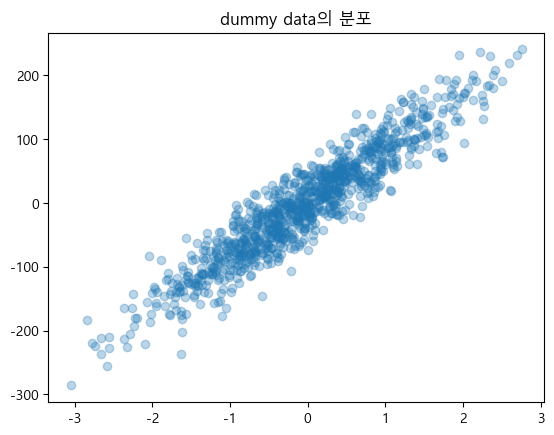

In [7]:
# data visualization
plt.scatter(X, y, alpha = 0.3)
plt.title('dummy data의 분포')
plt.show()

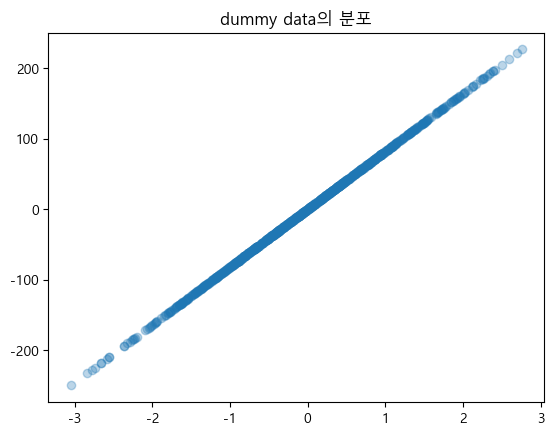

In [9]:
X, y = make_regression(n_samples = 1000, 
                       n_features = 1, 
                       n_informative = 1,  
                       random_state = 0)

plt.scatter(X, y, alpha = 0.3)
plt.title('dummy data의 분포')
plt.show()

In [11]:
print(y.mean(), np.median(y))
print(y.min(), y.max())

-3.7196664767863266 -4.7693468599041875
-250.36368823095452 226.79247528995796


In [26]:
# model 생성
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [27]:
pred = lr.predict(X)

In [28]:
mse = mean_squared_error(y, pred)
rmse = mean_squared_error(y, pred, squared = False)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)

In [30]:
print('MSE:', mse)
print('RMSE:', rmse)
print('r2:', r2)
print('MAE:', mae)

MSE: 885.9735841406376
RMSE: 29.765308399891268
r2: 0.8808989693851077
MAE: 23.627771430275853


> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

##### 모델 생성, 학습

##### 평가

##### 교차검증 (cross validation)

In [ ]:
# regression model은 cross validation할 때 parameter scoring은 기본값으로 r2를 갖는다.

In [38]:
result = cross_val_score(LinearRegression(), 
                         X, y, 
                         cv = 4)

In [39]:
print(result)
print(result.mean())

[0.89476539 0.85829536 0.88648045 0.88280056]
0.8805854394305845


In [ ]:
# MSE를 사용할 때는 scoring을 'neg_mean_squared_error'로 설정해야 한다.
# 그리고 결과를 출력할 때는 다시 음의 부호를 붙여 원복시켜야 한다.

In [42]:
result = cross_val_score(LinearRegression(), 
                         X, y, 
                         cv = 4, scoring = 'neg_mean_squared_error')
print(-result)
print(-result.mean())

[ 735.54110801 1074.82074735  899.29348416  843.75330125]
888.3521601915147


In [45]:
result = cross_val_score(LinearRegression(), 
                         X, y, 
                         cv = 4, scoring = 'neg_root_mean_squared_error')
print(-result)
print(-result.mean())

[27.12086112 32.78445893 29.98822242 29.04743192]
29.73524359958271


In [46]:
result = cross_val_score(LinearRegression(), 
                         X, y, 
                         cv = 4, scoring = 'neg_mean_absolute_error')
print(-result)
print(-result.mean())

[21.98313529 25.75860229 23.54541203 23.38231982]
23.667367357979494


##### 모델이 찾은 계수(coef, 가중치-weigth)와 절편(intercept, 편향-bias) 조회
- LinearRegression 모델은 선형 방정식을 이용해 예측값을 추론한다. 
- 학습이 끝나면 모델이 찾은 각 Feature에 곱해주는 계수와 절편을 다음 attribube로 조회할 수 있다.
    - coef_: Feature에 곱하는 가중치
    - intercept_: y절편. 모든 Feature가 0일때 예측값

$$
w * X + b = y
$$

$$
w: 가중치\\
b: 편향
$$

In [48]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
# 가중치는 feature마다 각각 다른 값들을 찾는다. feature가 5개라면 coef 역시 5개로 출력된다.
# 지금은 feature가 1개이므로 coef가 1개이다.

In [49]:
lr.coef_

array([82.01323352])

In [ ]:
# 편향은 feature의 개수와 무관하고 무조건 하나의 값만을 갖는다.

In [51]:
lr.intercept_

0.7763275132894489

##### X, y와 추론결과  시각화

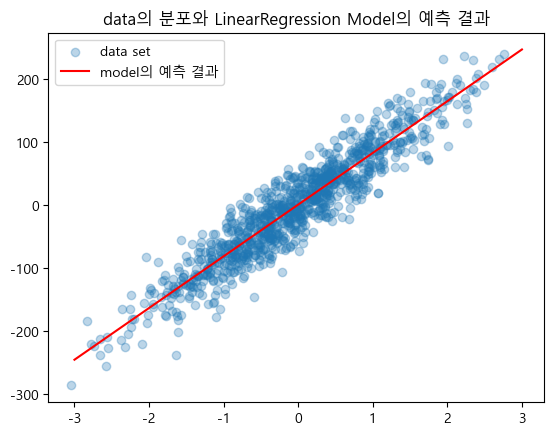

In [55]:
# model의 예측 결과 생성
X_sample = np.linspace(-3, 3, 100)
y_sample = lr.predict(X_sample.reshape(-1, 1))

plt.scatter(X, y, alpha = 0.3, label = 'data set')
plt.plot(X_sample, y_sample, color = 'red', label = 'model의 예측 결과')

plt.title('data의 분포와 LinearRegression Model의 예측 결과')
plt.legend()
plt.show()

In [56]:
# metrics module을 update한다.

In [68]:
from metrics import print_metrics_reression

## 기존 분류 모델의 회귀 모델

##### import

In [14]:
# data 관련
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# model 관련
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# visualization 관련
from graphviz import Source
from sklearn.tree import export_graphviz

# evaluation index 관련
from metrics import print_metrics_reression as pmr

In [2]:
# data 생성
# regression 문제에서는 data separation을 할 때 stratify를 설정하지 않는다.
# regression 문제는 label의 비율을 원본 data와 똑같게 나눌 필요가 없기 때문이다.

In [3]:
X, y = make_regression(n_samples = 1000, 
                       n_features = 1, 
                       n_informative = 1, 
                       noise = 30, 
                       random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### 모델들 생성

In [17]:
knn = KNeighborsRegressor(n_neighbors = 3)
tree = DecisionTreeRegressor(max_depth = 3, random_state = 0)
rf = RandomForestRegressor(n_estimators = 200, max_depth = 3, random_state = 0)
gb = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 0)
lr = LinearRegression()
xgb = XGBRegressor(n_estimators = 200, max_depth = 1, random_state = 0)
svr = SVR()

estimators = [
    ('KNN', knn), 
    ('Decision Tree', tree), 
    ('Random Forest', rf), 
    ('Gradient Boosting', gb), 
    ('Linear Regression', lr), 
    ('XGBoost', xgb), 
    ('SVM', svr)
]

##### 모델 학습 및 평가

In [18]:
for model_name, model in estimators:
    model.fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    pmr(y_train, pred_train, f'{model_name}의 train data set에 대한 평가')
    print('-' * 50)
    pmr(y_test, pred_test, f'{model_name}의 test data set에 대한 평가')
    print('=' * 50)

KNN의 train data set에 대한 평가
MSE: 605.566
RMSE: 24.608
MAE: 19.608
R^2: 0.921
--------------------------------------------------
KNN의 test data set에 대한 평가
MSE: 1241.497
RMSE: 35.235
MAE: 27.796
R^2: 0.806
Decision Tree의 train data set에 대한 평가
MSE: 999.747
RMSE: 31.619
MAE: 25.606
R^2: 0.870
--------------------------------------------------
Decision Tree의 test data set에 대한 평가
MSE: 1057.638
RMSE: 32.521
MAE: 26.122
R^2: 0.835
Random Forest의 train data set에 대한 평가
MSE: 871.589
RMSE: 29.523
MAE: 23.695
R^2: 0.886
--------------------------------------------------
Random Forest의 test data set에 대한 평가
MSE: 913.618
RMSE: 30.226
MAE: 24.430
R^2: 0.857
Gradient Boosting의 train data set에 대한 평가
MSE: 808.368
RMSE: 28.432
MAE: 22.647
R^2: 0.895
--------------------------------------------------
Gradient Boosting의 test data set에 대한 평가
MSE: 876.818
RMSE: 29.611
MAE: 23.993
R^2: 0.863
Linear Regression의 train data set에 대한 평가
MSE: 899.611
RMSE: 29.994
MAE: 23.768
R^2: 0.883
--------------------------------

##### Voting
- VotingRegressor 
    - 각 모델이 예측한 값의 평균을 출력한다.

In [24]:
estimators = [
    ('KNN', knn), 
    ('Decision Tree', tree), 
    ('Random Forest', rf), 
    ('Gradient Boosting', gb), 
    ('Linear Regression', lr), 
    ('XGBoost', xgb)
]

voting = VotingRegressor(estimators = estimators)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('KNN', KNeighborsRegressor(n_neighbors=3)),
                            ('Decision Tree',
                             DecisionTreeRegressor(max_depth=3,
                                                   random_state=0)),
                            ('Random Forest',
                             RandomForestRegressor(max_depth=3,
                                                   n_estimators=200,
                                                   random_state=0)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(max_depth=1,
                                                       n_estimators=200,
                                                       random_state=0)),
                            ('Linear Regression', LinearRegression...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=1,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=200, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=0, ...))])

In [25]:
pred_train = voting.predict(X_train)
pred_test = voting.predict(X_test)

pmr(y_train, pred_train)
print('-' * 50)
pmr(y_test, pred_test)

MSE: 765.933
RMSE: 27.675
MAE: 22.224
R^2: 0.900
--------------------------------------------------
MSE: 899.324
RMSE: 29.989
MAE: 24.172
R^2: 0.860


##### DecisionTreeRegressor Tree 시각화

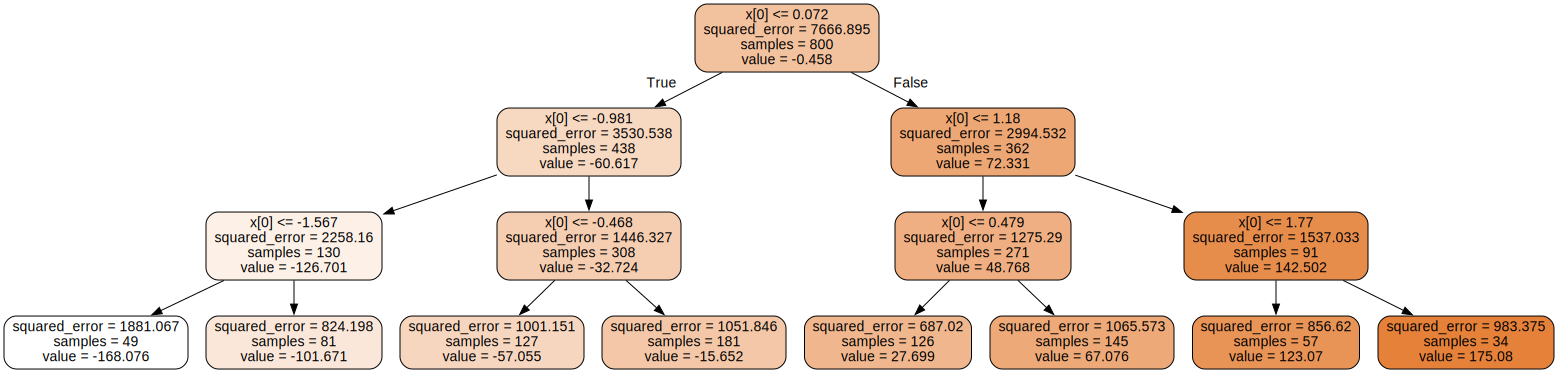

In [26]:
graph = Source(export_graphviz(tree, 
                               rounded = True, 
                               filled = True))
graph